## Visualizations For Central, Northern and Southern London for Mental Health and Weather Data

Notes:
- I separated the regions because data is available for different months for the different regions, as below.
- Central and west London: Dec 2019 to March 2021
- South east and south west London: April 2020 to Dec 2021
- North Central region: April 2020 to Dec 2021
- Central London shows the most clear trend for the relationship between weather and mental health cases. The other regions are not as clear.
- Measure value is the number of Mental health cases for adults and children for that month in a region

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')
sns.set(font_scale=1.3)

In [2]:
#Load the london regions and overall weather data which has weather from jan 2019 to dec 2021
sdf = pd.read_csv('region_south_e_and_w_london_apr20_to_dec21.csv')
ndf = pd.read_csv('region_north_central_london_apr20_to_dec21.csv')
cdf = pd.read_csv('region_central_and_west_london_dec19_to_march21.csv')
weather = pd.read_csv('merged_weather_temp_and_daylight.csv')

In [3]:
sdf.shape, ndf.shape, cdf.shape, weather.shape

((21, 4), (21, 4), (16, 4), (36, 3))

In [4]:
sdf.head()

,month,measure value,daylight hours,average temperature
0,Apr-20,65735.0,13.43,11.64
1,Apr-21,73460.0,13.43,7.23
2,Aug-20,69815.0,14.00,19.35
3,Aug-21,74760.0,14.03,16.81
4,Dec-20,72380.0,7.23,5.87


In [5]:
weather.head()

,Date,daylight_hours,Average Temperature
0,Jan-19,7.97,4.47
1,Feb-19,9.46,7.11
2,Mar-19,11.39,9.03
3,Apr-19,13.40,9.95
4,May-19,15.16,12.66


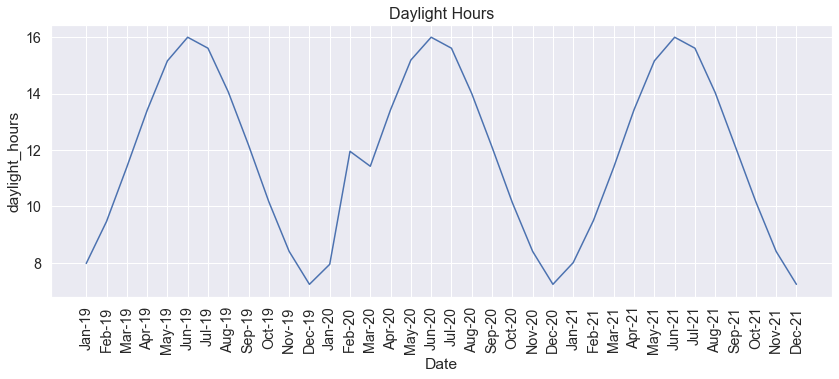

In [6]:
#visualizing the Daylight hours from the weather dataset
plt.figure(figsize=(14,5))
sns.lineplot(
    x="Date", 
    y="daylight_hours",
    data=weather)
plt.xticks(rotation=90)
plt.title('Daylight Hours', size=16)
plt.show()

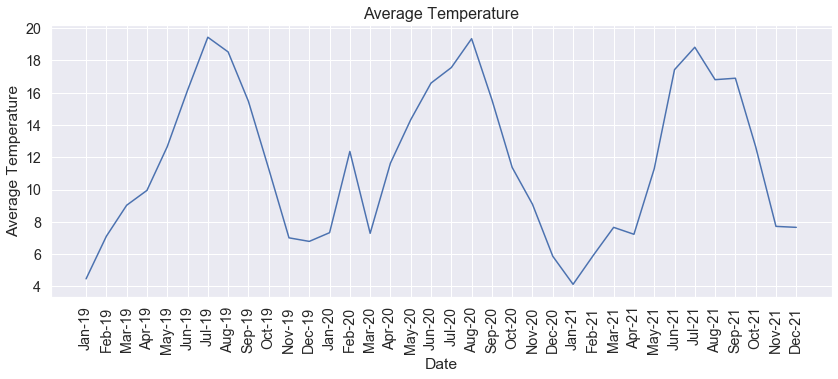

In [7]:
#visualizing the Average Temperature from the weather dataset
plt.figure(figsize=(14,5))
sns.lineplot(
    x="Date", 
    y="Average Temperature",
    data=weather)
plt.xticks(rotation=90)
plt.title('Average Temperature', size=16)
plt.show()

## Central and West London
### Dec 2019 to March 2021

In [8]:
cdf.head()

,month,measure value,daylight hours,average temperature
0,Apr-20,8650.0,13.43,11.640000
1,Aug-20,8515.0,14.00,19.350000
2,Dec-19,9370.0,7.23,6.790000
3,Dec-20,9050.0,7.23,5.870000
4,Feb-20,9965.0,11.95,12.363636


In [9]:
cwdf = weather.merge(cdf, left_on='Date',right_on='month', how='left')

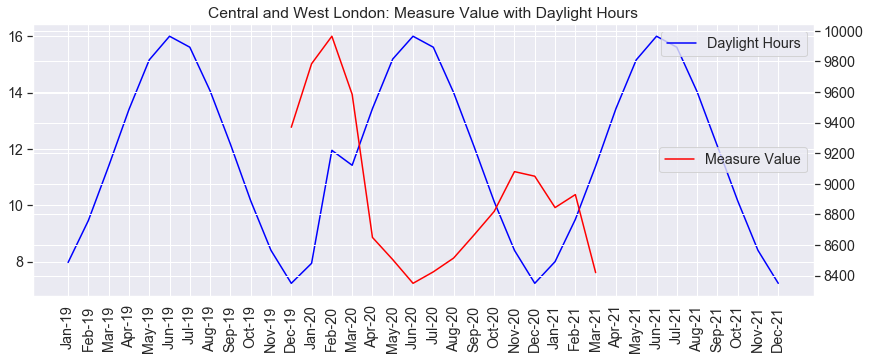

In [10]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(cwdf['Date'], cwdf['daylight_hours'], color='blue', label='Daylight Hours')
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(cwdf['Date'], cwdf['measure value'], color='red', label='Measure Value')
ax.legend(loc='upper right')
ax2.legend(loc='right')
plt.title('Central and West London: Measure Value with Daylight Hours')
plt.show()

We see a clear trend where months with high daylight hours (April to sept 2020) have least mental health cases, and as the daylight hours decrease, measure value rises.

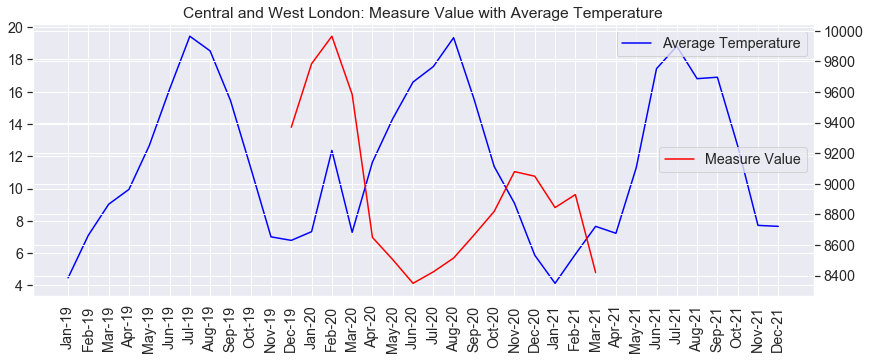

In [11]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(cwdf['Date'], cwdf['Average Temperature'], color='blue', label='Average Temperature')
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(cwdf['Date'], cwdf['measure value'], color='red', label='Measure Value')
ax.legend(loc='upper right')
ax2.legend(loc='right')
plt.title('Central and West London: Measure Value with Average Temperature')
plt.show()

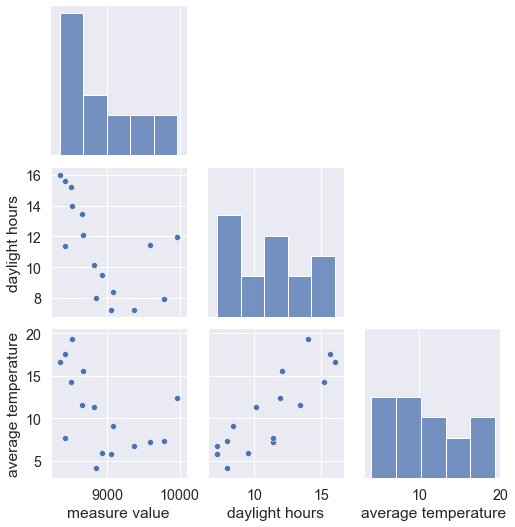

In [12]:
sns.pairplot(cdf, corner=True);

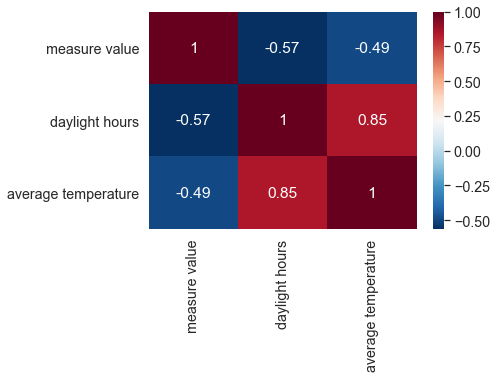

In [13]:
sns.heatmap(cdf.corr(), cmap='RdBu_r', annot=True);

There is a strong negative correlation between the daylight hours and the measure value

## Southern London: South East and South West London
### April 2020 to Dec 2021

There is no obvious trend here like with central london. Perhaps we need more data from 2019 because these high measure values could be coz of covid lockdowns.

But the NHS data did not have data for South London for 2019.

In [14]:
adf = weather.merge(sdf, left_on='Date',right_on='month', how='left')

In [15]:
adf.head(3)

,Date,daylight_hours,Average Temperature,month,measure value,daylight hours,average temperature
0,Jan-19,7.97,4.47,NaN,NaN,NaN,NaN
1,Feb-19,9.46,7.11,NaN,NaN,NaN,NaN
2,Mar-19,11.39,9.03,NaN,NaN,NaN,NaN


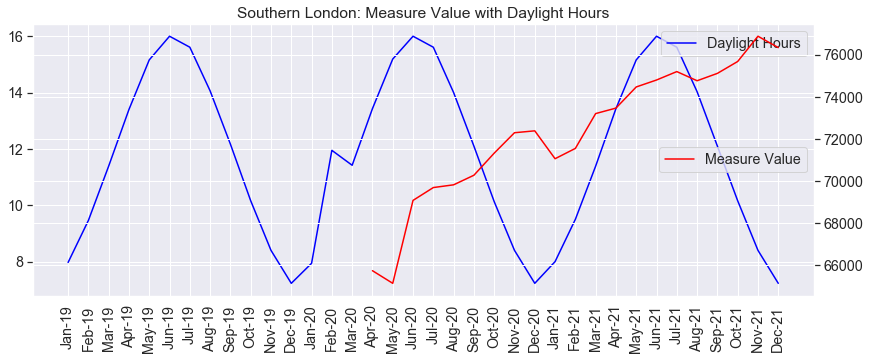

In [16]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(adf['Date'], adf['daylight_hours'], color='blue', label='Daylight Hours')
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(adf['Date'], adf['measure value'], color='red', label='Measure Value')
ax.legend(loc='upper right')
ax2.legend(loc='right')
plt.title('Southern London: Measure Value with Daylight Hours')
plt.show()

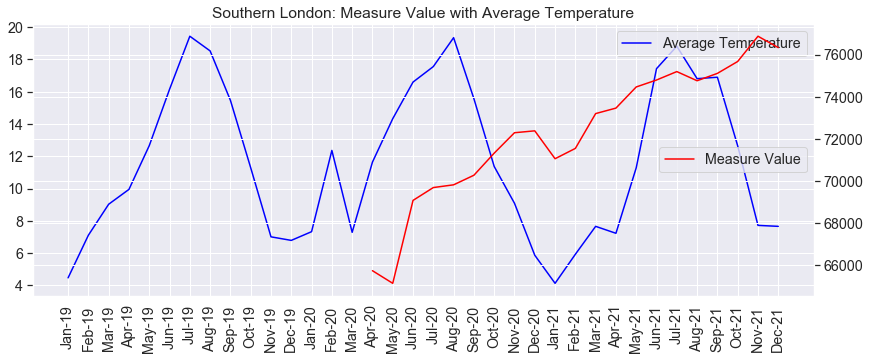

In [17]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(adf['Date'], adf['Average Temperature'], color='blue', label='Average Temperature')
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(adf['Date'], adf['measure value'], color='red', label='Measure Value')
ax.legend(loc='upper right')
ax2.legend(loc='right')
plt.title('Southern London: Measure Value with Average Temperature')
plt.show()

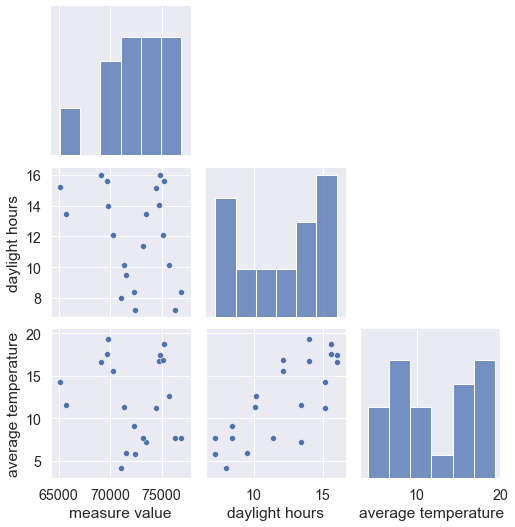

In [18]:
sns.pairplot(sdf, corner=True);

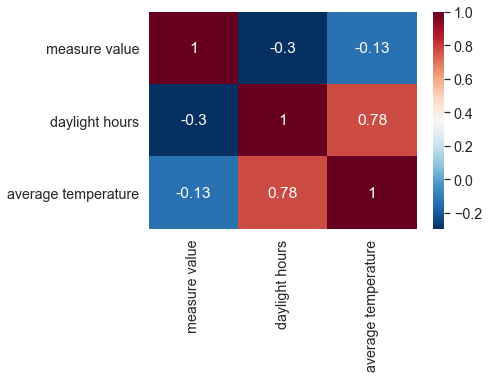

In [19]:
sns.heatmap(sdf.corr(), cmap='RdBu_r', annot=True);

## Northern London: North Central London
### April 2020 to Dec 2021

There is no obvious trend here also

In [20]:
ndf.head()

,measure value,month,daylight hours,average temperature
0,33435.0,Apr-20,13.43,11.64
1,33435.0,May-20,15.19,14.33
2,35345.0,Jun-20,16.00,16.60
3,35580.0,Jul-20,15.61,17.56
4,35485.0,Aug-20,14.00,19.35


In [21]:
nwdf = weather.merge(ndf, left_on='Date',right_on='month', how='left')

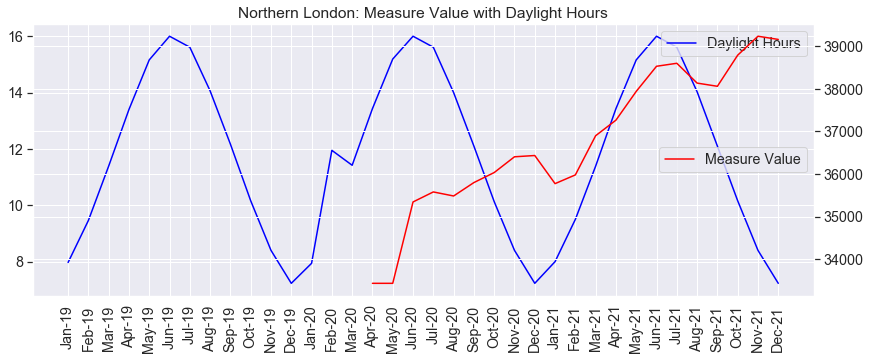

In [22]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(nwdf['Date'], nwdf['daylight_hours'], color='blue', label='Daylight Hours')
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(nwdf['Date'], nwdf['measure value'], color='red', label='Measure Value')
ax.legend(loc='upper right')
ax2.legend(loc='right')
plt.title('Northern London: Measure Value with Daylight Hours')
plt.show()

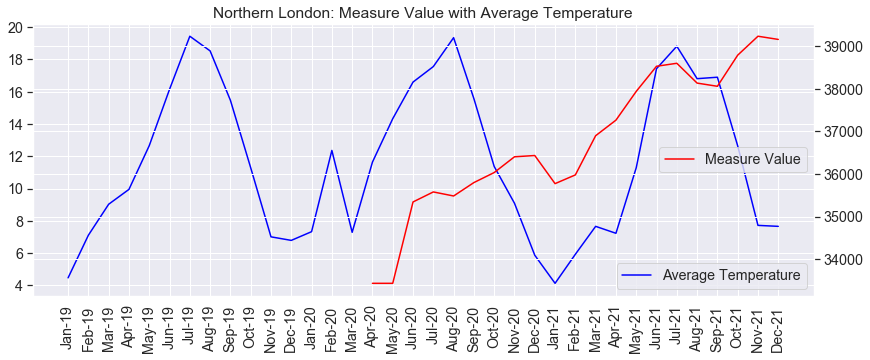

In [23]:
fig, ax = plt.subplots(figsize=(14, 5))
ax.plot(nwdf['Date'], nwdf['Average Temperature'], color='blue', label='Average Temperature')
plt.xticks(rotation=90)
ax2 = ax.twinx()
ax2.plot(nwdf['Date'], nwdf['measure value'], color='red', label='Measure Value')
ax.legend(loc='lower right')
ax2.legend(loc='right')
plt.title('Northern London: Measure Value with Average Temperature')
plt.show()

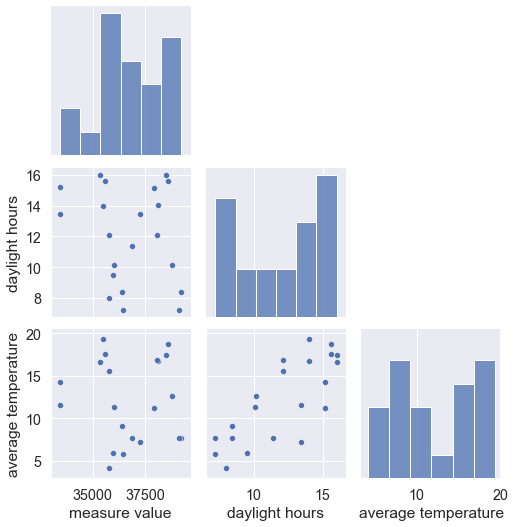

In [24]:
sns.pairplot(ndf, corner=True);

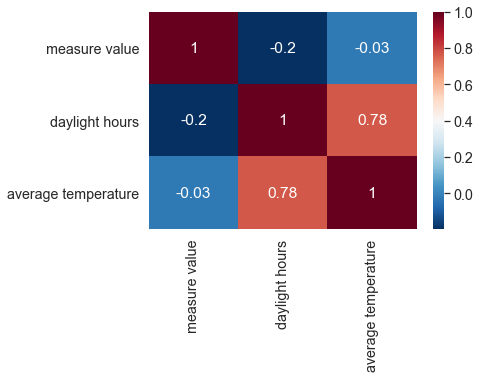

In [25]:
sns.heatmap(ndf.corr(), cmap='RdBu_r', annot=True);